- Check current working directory type pwd

## Predict house price 

In [1]:
pwd

'C:\\Users\\ved deo\\Downloads\\deep_learning_projects\\ineuron_ANN'

- Always create new environment to work on different project
- conda create -n myenv python=3.6
- pip install tensorflow==2.0.0

###  In this solution i haven't perform EDA alot, mainly focused on the ANN architect

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
tf.__version__

'2.2.0'

In [5]:
keras.__version__

'2.3.0-tf'

In [6]:
# load dataset
df= pd.read_csv("D:/Data Science with Python/Module 5/Linear Regression/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.shape

(545, 13)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [10]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


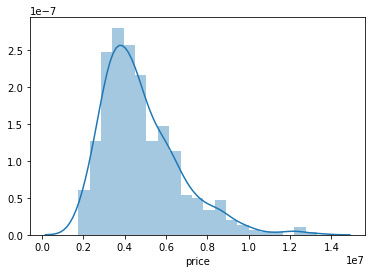

In [12]:
sns.distplot(df['price']);

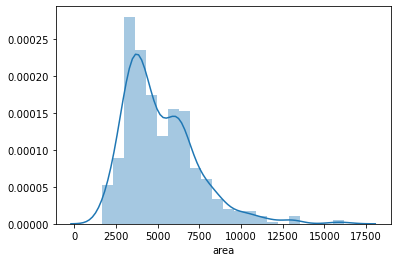

In [13]:
sns.distplot(df['area']);

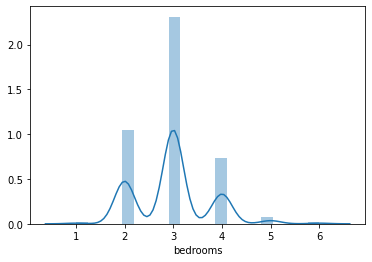

In [14]:
sns.distplot(df['bedrooms']);

In [15]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
df_cat = df.select_dtypes('object')
df_cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [18]:
df_cont = df.select_dtypes(['int64','float64'])

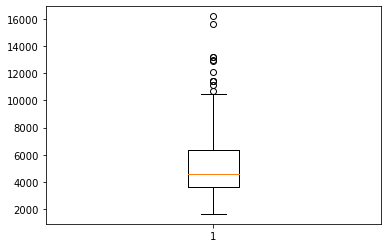

In [19]:
plt.boxplot(df['area']);

In [20]:
df_cont.iplot(kind = 'box')

- Convert string to values using dummies

In [21]:
dummy = pd.get_dummies(df_cat,drop_first=True)
df.drop(df_cat.columns,1,inplace=True)

In [22]:
df = pd.concat([df,dummy],axis=1)

In [23]:
df.shape

(545, 14)

In [24]:
dataset = df.values
dataset

array([[13300000,     7420,        4, ...,        1,        0,        0],
       [12250000,     8960,        4, ...,        0,        0,        0],
       [12250000,     9960,        3, ...,        1,        1,        0],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        1],
       [ 1750000,     2910,        3, ...,        0,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        1]],
      dtype=int64)

In [25]:
dataset.shape

(545, 14)

In [26]:
X = dataset[:,1:14]

In [27]:
y = dataset[:,1]

- Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(381, 13)
(164, 13)


In [31]:
model = Sequential()
model.add(Dense(200, input_dim=13,kernel_initializer = 'he_uniform', activation= "relu"),)
model.add(Dense(150,kernel_initializer = 'he_uniform', activation= "relu"))
model.add(Dense(100,kernel_initializer = 'he_uniform', activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 48,151
Trainable params: 48,151
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=30)

Epoch 1/30
12/12 [==============================] - 0s 7ms/step - loss: 433932.4375 - mean_squared_error: 433932.4375 - val_loss: 18778.2344 - val_mean_squared_error: 18778.2344
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 78214.3672 - mean_squared_error: 78214.3672 - val_loss: 6718.7974 - val_mean_squared_error: 6718.7974
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 24570.2754 - mean_squared_error: 24570.2754 - val_loss: 139.6226 - val_mean_squared_error: 139.6226
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 6462.1357 - mean_squared_error: 6462.1357 - val_loss: 680.0909 - val_mean_squared_error: 680.0909
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 2851.3826 - mean_squared_error: 2851.3826 - val_loss: 1772.8306 - val_mean_squared_error: 1772.8306
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 886.0665 - mean_squared_error: 886.0665 - val_loss: 701.8557 -

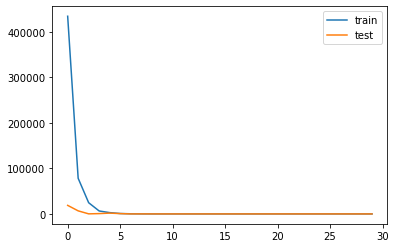

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred_test= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test)))

1.1837927006558666
1.1861675750723217


- Now scale data and then again build fit ANN

In [37]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [38]:
X_scale = scale.fit_transform(X)

In [39]:
y_scale = y/max(y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(381, 13)
(164, 13)


- We can use drop_uout also in case of overfitting

In [41]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(200, input_dim=13,kernel_initializer = 'he_uniform', activation= "relu",kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(150,kernel_initializer = 'he_uniform', activation= "relu"))
model.add(Dense(100,kernel_initializer = 'he_uniform', activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 48,151
Trainable params: 48,151
Non-trainable params: 0
_________________________________________________________________


In [42]:
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model_mlp_reg.h5', monitor='val_mean_squared_error', mode='max', verbose=1, save_best_only=True)

In [44]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50,callbacks=[es, mc])

Epoch 1/50
 1/12 [=>............................] - ETA: 0s - loss: 9.4942 - mean_squared_error: 0.6483
Epoch 00001: val_mean_squared_error improved from -inf to 0.03890, saving model to best_model_mlp_reg.h5
12/12 [==============================] - 0s 9ms/step - loss: 8.9213 - mean_squared_error: 0.1790 - val_loss: 8.6481 - val_mean_squared_error: 0.0389
Epoch 2/50
 1/12 [=>............................] - ETA: 0s - loss: 8.6434 - mean_squared_error: 0.0342
Epoch 00002: val_mean_squared_error did not improve from 0.03890
12/12 [==============================] - 0s 3ms/step - loss: 8.5284 - mean_squared_error: 0.0353 - val_loss: 8.3801 - val_mean_squared_error: 0.0279
Epoch 3/50
 1/12 [=>............................] - ETA: 0s - loss: 8.3769 - mean_squared_error: 0.0247
Epoch 00003: val_mean_squared_error did not improve from 0.03890
12/12 [==============================] - 0s 3ms/step - loss: 8.2508 - mean_squared_error: 0.0176 - val_loss: 8.1076 - val_mean_squared_error: 0.0180
Epoch 

 1/12 [=>............................] - ETA: 0s - loss: 3.0556 - mean_squared_error: 8.8398e-04
Epoch 00026: val_mean_squared_error did not improve from 0.03890
12/12 [==============================] - 0s 3ms/step - loss: 2.9763 - mean_squared_error: 7.2267e-04 - val_loss: 2.8837 - val_mean_squared_error: 0.0023
Epoch 27/50
 1/12 [=>............................] - ETA: 0s - loss: 2.8819 - mean_squared_error: 5.5064e-04
Epoch 00027: val_mean_squared_error did not improve from 0.03890
12/12 [==============================] - 0s 3ms/step - loss: 2.8050 - mean_squared_error: 7.1543e-04 - val_loss: 2.7155 - val_mean_squared_error: 0.0026
Epoch 28/50
 1/12 [=>............................] - ETA: 0s - loss: 2.7137 - mean_squared_error: 7.9156e-04
Epoch 00028: val_mean_squared_error did not improve from 0.03890
12/12 [==============================] - 0s 3ms/step - loss: 2.6391 - mean_squared_error: 7.1415e-04 - val_loss: 2.5521 - val_mean_squared_error: 0.0021
Epoch 29/50
 1/12 [=>..........

In [45]:
pred_train= model.predict(X_train)
print('TRAIN_RMSE:',np.sqrt(mean_squared_error(y_train,pred_train)))

pred_test= model.predict(X_test)
print('TEST_RMSE:',np.sqrt(mean_squared_error(y_test,pred_test)))

TRAIN_RMSE: 0.04066387060944408
TEST_RMSE: 0.04455299316501408


In [46]:
pred_train= model.predict(X_train)
print('TRAIN_MSE:',mean_squared_error(y_train,pred_train))

pred_test= model.predict(X_test)
print('TEST_MSE:',mean_squared_error(y_test,pred_test))

TRAIN_MSE: 0.00165355037294161
TEST_MSE: 0.001984969199961791


- Now we can see the loss 
- Before scaling  MSE on train is 0.2 and on test MSE is 0.2
- After scaling MSE on train is 0.0003 and on test is 0.0004

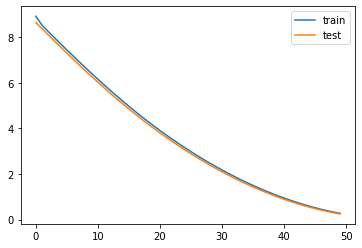

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

- Saving model and checking accuracy from model

In [49]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_mlp_reg.h5')

In [50]:
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.036, Test: 0.039
